# **Support Vector Machines - Practical Implementation**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
# loading dataset
# classification dataset
df_clf = sns.load_dataset('iris')

# regression dataset
df_reg = pd.read_csv('/content/housing.csv')

**Label Encoding**

In [11]:
df_clf['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
df_clf['species'] = df_clf['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

**Train Test Split**

In [6]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [13]:
# splitting
# classification dataset
X_clf = df_clf.drop('species', axis=1)
y_clf = df_clf[['species']]

# regression
X_reg = df_reg.drop('MEDV', axis=1)
y_reg = df_reg[['MEDV']]

In [14]:
# classification train test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# regression train test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

**Standardizing**

In [15]:
# importing library
from sklearn.preprocessing import StandardScaler

In [16]:
# scaling
scaler = StandardScaler()

# classification data
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

# regression data
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

## **Support Vector Machines Implementation**

### **Support Vector Classifier**

In [18]:
# importing support vector classifier
from sklearn.svm import SVC

# importing grid search cv
from sklearn.model_selection import GridSearchCV

**Training**

In [19]:
svc = SVC()

In [20]:
parameters = {
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kernel': ['linear', 'polynomial', 'rbf', 'sigmoid']
}
svc_cv = GridSearchCV(svc, param_grid=parameters, scoring='accuracy', cv=5)
svc_cv.fit(X_train_clf, y_train_clf)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ['linear', 'polynomial', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [21]:
# best parameters
svc_cv.best_params_

{'C': 5, 'kernel': 'linear'}

In [22]:
# best score
svc_cv.best_score_

0.9619047619047618

**Testing**

In [23]:
# importing metrics
from sklearn.metrics import accuracy_score, classification_report

In [27]:
svc_cv_pred = svc_cv.predict(X_test_clf)

In [28]:
# accuracy score
accuracy_score(svc_cv_pred, y_test_clf)

0.9777777777777777

In [30]:
# classification report
print(classification_report(svc_cv_pred, y_test_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



### **Support Vector Regressor**

In [32]:
# importing support vector regressor
from sklearn.svm import SVR

# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

**Training**

In [33]:
svr = SVR()

In [61]:
parameters = {
    'C': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    'kernel': ['linear', 'polynomial', 'rbf', 'sigmoid']
}
svr_cv = GridSearchCV(svr, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
svr_cv.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                               22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                               34, 35, 36, 37, 38, 39, ...],
                         'kernel': ['linear', 'polynomial', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [62]:
# best parameters
svr_cv.best_params_

{'C': 40, 'kernel': 'rbf'}

In [63]:
# best score
svr_cv.best_score_

-11.134682721701672

**Testing**

In [37]:
# importing metrics
from sklearn.metrics import r2_score

In [64]:
svr_cv_pred = svr_cv.predict(X_test_reg)

<Axes: ylabel='Density'>

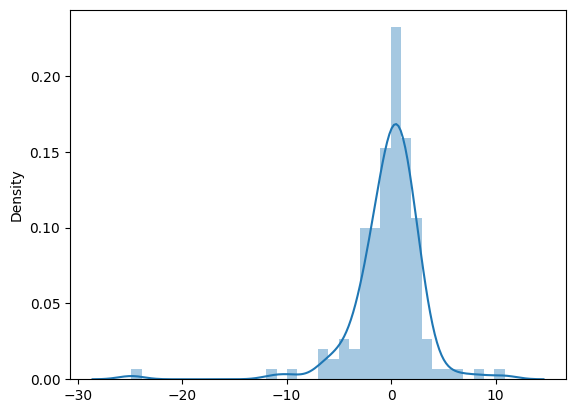

In [65]:
sns.distplot(svr_cv_pred.reshape(len(svr_cv_pred), 1) - y_test_reg)

In [66]:
# r2 score
r2_score(svr_cv_pred, y_test_reg)

0.801117192355061